In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 5
N = L*L
J = 1
B = 0
sc = np.ones(N)

In [3]:
def sweep(sc,func): # periodic
    res = 0
    # print(self.sc)
    for i in range(N):
        sum = func(i)
        res += J*sum*sc[i]

    sigma = np.sum(sc)
    HH = -res -B*sigma
    return HH
    # print(sigma,HH)
    # for k in range(self.intv):
    #     T = (5/self.intv)*(k+1)
    #     ex = np.exp(-HH/T)
    #     self.ZU[k] += np.absolute(sigma)*ex
    #     self.Z[k] += ex
    #     self.E[k] += HH*ex
    #     self.E2[k] += HH*HH*ex

def pbc(sc,i): #periodic boundary condition
    sum = 0

    nn = i -1
    if((nn+1 % L) == 0) : nn += L
    sum += sc[nn]

    nn = i + 1
    if(nn % L == 0): nn -= L
    sum += sc[nn]

    nn = i - L
    if(nn < 0): nn += N
    sum += sc[nn]

    nn = i + L
    if(nn >= N): nn -= N
    sum += sc[nn]
    return sum

def pbc2(i): #periodic boundary condition
    sum = 0

    nn = i + 1
    if(nn % L == 0): nn -= L
    sum += sc[nn]

    nn = i + L
    if(nn >= N): nn -= N
    sum += sc[nn]
    return sum

In [57]:
# choose random site from sc
k = np.random.randint(N)

In [60]:
E_old = sweep(sc,pbc2)
sc[k] *= -1
E_new = sweep(sc,pbc2)
sc[k] *= -1
print(E_old,E_new)

-50.0 -42.0


In [81]:
t1 = pbc(sc,k)
print(2*t1*sc[k])

8.0


In [87]:
beta = 1/2
if(E_new-E_old > 0) :
    A = np.exp(-beta*(E_new-E_old))
else:
    A = 1
print(A)


0.01831563888873418


In [86]:
count = 0
for i in range(10000):
    if(np.random.rand() < A):
        count += 1
print(count)

179


In [115]:
import csv
a = open("../C++/Metropolis_c_5.csv")

In [125]:
import csv
a = open("../C++/Metropolis_c_5.csv")

rdr = csv.reader(a)
T2 = np.zeros(25)
M2 = np.zeros(25)
C2 = np.zeros(25)

c = 0
for line in rdr:
    if c == 0 :
        c += 1
        continue
    print(line)
    T2[c-1] = line[1]
    M2[c-1] = line[2]
    C2[c-1] = line[3]
    c += 1

['0', '0.200000', '1.000000', '-0.000000', '25.000000', '625.000000', '-50.000000', '2500.000000']
['1', '0.400000', '1.000000', '-0.000000', '25.000000', '625.000000', '-50.000000', '2500.000000']
['2', '0.600000', '0.999964', '0.003752', '24.999111', '624.959556', '-49.997333', '2499.767111']
['3', '0.800000', '0.998773', '0.071617', '24.969333', '623.888889', '-49.941111', '2495.260444']
['4', '1.000000', '0.996800', '0.129910', '24.920000', '621.636444', '-49.784444', '2481.738667']
['5', '1.200000', '0.981622', '0.494725', '24.540556', '607.243556', '-48.929333', '2411.889778']
['6', '1.400000', '0.949573', '0.948493', '23.739333', '577.005778', '-47.120444', '2266.812444']
['7', '1.600000', '0.874156', '1.609065', '21.853889', '511.334667', '-43.331111', '1980.565333']
['8', '1.800000', '0.765707', '1.928569', '19.142667', '419.238667', '-37.793111', '1584.533333']
['9', '2.000000', '0.689053', '1.715710', '17.226333', '355.140889', '-33.615111', '1301.546667']
['10', '2.200000',

In [122]:
T2, M2, C2

(array([0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6,
        2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8, 5. ]),
 array([1.      , 1.      , 0.999964, 0.998773, 0.9968  , 0.981622,
        0.949573, 0.874156, 0.765707, 0.689053, 0.596404, 0.519924,
        0.465609, 0.416658, 0.385378, 0.367204, 0.336009, 0.319831,
        0.309538, 0.293387, 0.282169, 0.272093, 0.267   , 0.262156,
        0.256178]),
 array([-0.      , -0.      ,  0.003752,  0.071617,  0.12991 ,  0.494725,
         0.948493,  1.609065,  1.928569,  1.71571 ,  1.335263,  1.046091,
         0.774192,  0.599579,  0.448554,  0.380947,  0.305007,  0.249341,
         0.214246,  0.181745,  0.160673,  0.135916,  0.121641,  0.108941,
         0.100186]))

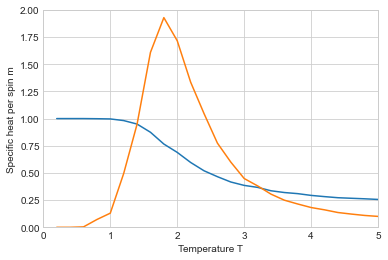

In [126]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,2)
plt.xlim(0,5)
plt.plot(T2,M2)
plt.plot(T2,C2)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

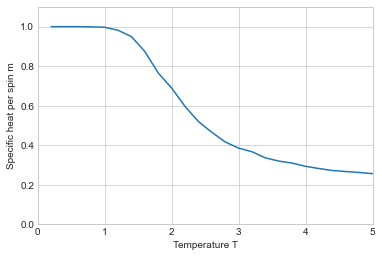

In [127]:
plt.style.use('seaborn-whitegrid')
plt.ylim(0,1.1)
plt.xlim(0,5)
plt.plot(T2,M2)

plt.ylabel('Specific heat per spin m')
plt.xlabel('Temperature T')
plt.show()

In [5]:
f = open('test.txt','w')

In [12]:
data = np.array([1,1,1,1,1,1,1])
np.array2string(data, precision=2, separator=',',suppress_small=True)[1:-1]

'1,1,1,1,1,1,1'